In [ ]:
# This notebook loads and runs a model from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification,


import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import PIL

import os

FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color


cat.4.jpg


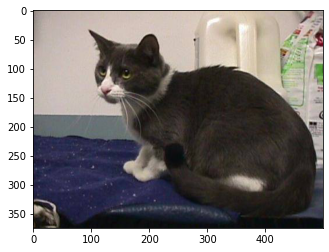

In [ ]:
# Show an example of our data
sample = random.choice(os.listdir("testdata"))
print(sample)
image = load_img("testdata/"+sample)
plt.imshow(image)

In [ ]:
# Create a model, load its weights from file

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.load_weights('model.h5')

In [ ]:
def get_prediction(test_img):
    """Evaluate the model on a PIL image"""
    test_img = test_img.resize((128,128), resample=PIL.Image.BICUBIC)
    test_arr = img_to_array(test_img)
    test_arr = np.expand_dims(test_arr, axis=0)
    test_arr /= 255.0
    
    return float(model.predict(test_arr))

It's a cat!


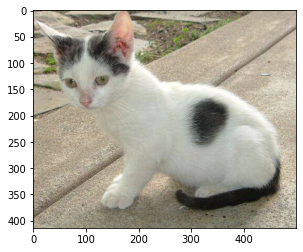

In [ ]:
test_img = load_img('testdata/cat.3.jpg')

plt.imshow(test_img)
score = get_prediction(test_img)

if score < 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

In [ ]:
# install anvil

!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
#connect to the anvil server

import anvil.server

anvil.server.connect("SX4GJANWY5ZRSTVNKDZ2XRHF-VJNTDWYDLBNBS3TE")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
# take in the picture from anvil and run it through the model to get the output

import anvil.media

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f)

    score = get_prediction(img)

    return score, 'dog' if score < 0.5 else 'cat'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d08c32ac-6fc1-4441-b12d-cc77c2d43474' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>